In [9]:
import pandas as pd

old = pd.read_csv('comparatie_pred_vs_real_version1.csv')
new = pd.read_csv('comparatie_pred_vs_real_version2.csv')

print("Old model shape:", old.shape)
print("New model shape:", new.shape)
# print("\nOld model head:\n", old.head())
# print("\nNew model head:\n", new.head())

# Accuracy calculation
old_acc = old['match'].mean()
new_acc = new['match'].mean()
print(f"Old model accuracy: {old_acc:.2%}")
print(f"New model accuracy: {new_acc:.2%}")

# Distribution of predicted algorithms
print("\nOld model predicted algorithms:\n", old['predicted_algorithm'].value_counts())
print("\nNew model predicted algorithms:\n", new['predicted_algorithm'].value_counts())

print("\nModel real best algorithms:\n", new['real_algorithm'].value_counts())


Old model shape: (101, 4)
New model shape: (101, 4)
Old model accuracy: 65.35%
New model accuracy: 86.14%

Old model predicted algorithms:
 predicted_algorithm
Branch and Cut    64
Greedy            27
KMeans-Greedy     10
Name: count, dtype: int64

New model predicted algorithms:
 predicted_algorithm
Greedy            65
Branch and Cut    30
KMeans-Greedy      6
Name: count, dtype: int64

Model real best algorithms:
 real_algorithm
Greedy            62
Branch and Cut    38
KMeans-Greedy      1
Name: count, dtype: int64


In [10]:
# Classification report
from sklearn.metrics import classification_report

def normalize(s):
    return s.str.lower().str.replace('-', '').str.replace(' ', '')

print("\nOld model classification report:")
print(classification_report(
    normalize(old['real_algorithm']),
    normalize(old['predicted_algorithm']),
    zero_division=0
))

print("\nNew model classification report:")
print(classification_report(
    normalize(new['real_algorithm']),
    normalize(new['predicted_algorithm']),
    zero_division=0
))



Old model classification report:
              precision    recall  f1-score   support

branchandcut       0.59      1.00      0.75        38
      greedy       1.00      0.44      0.61        62
kmeansgreedy       0.10      1.00      0.18         1

    accuracy                           0.65       101
   macro avg       0.56      0.81      0.51       101
weighted avg       0.84      0.65      0.65       101


New model classification report:
              precision    recall  f1-score   support

branchandcut       0.97      0.76      0.85        38
      greedy       0.89      0.94      0.91        62
kmeansgreedy       0.00      0.00      0.00         1

    accuracy                           0.86       101
   macro avg       0.62      0.57      0.59       101
weighted avg       0.91      0.86      0.88       101



In [11]:
# Average match rate by class
print("\nOld model match rate by class:")
print(old.groupby('real_algorithm')['match'].mean())

print("\nNew model match rate by class:")
print(new.groupby('real_algorithm')['match'].mean())


Old model match rate by class:
real_algorithm
Branch and Cut    1.000000
Greedy            0.435484
KMeans-Greedy     1.000000
Name: match, dtype: float64

New model match rate by class:
real_algorithm
Branch and Cut    0.763158
Greedy            0.935484
KMeans-Greedy     0.000000
Name: match, dtype: float64


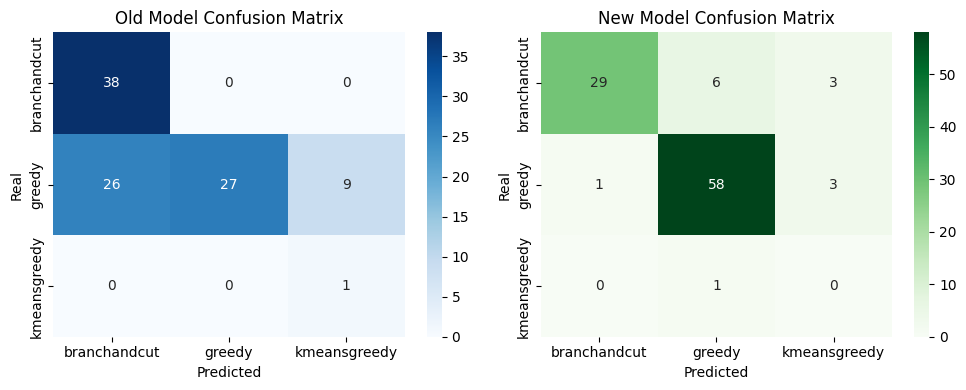

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = sorted(set(normalize(old['real_algorithm'])) | set(normalize(old['predicted_algorithm'])))

cm_old = confusion_matrix(
    normalize(old['real_algorithm']),
    normalize(old['predicted_algorithm']),
    labels=labels
)
cm_new = confusion_matrix(
    normalize(new['real_algorithm']),
    normalize(new['predicted_algorithm']),
    labels=labels
)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_old, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Old Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')

plt.subplot(1,2,2)
sns.heatmap(cm_new, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.title('New Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

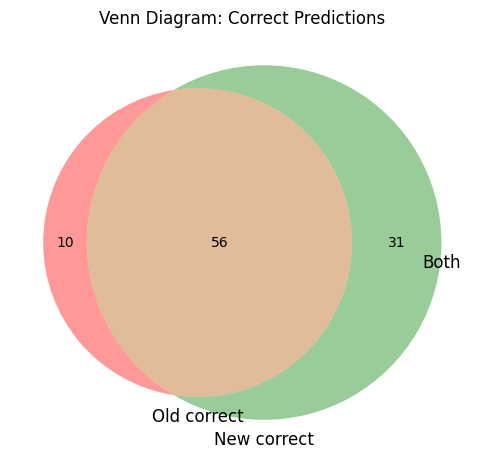

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

old_correct = set(old[old['match']]['instance_id'])
new_correct = set(new[new['match']]['instance_id'])
all_ids = set(old['instance_id']) | set(new['instance_id'])

plt.figure(figsize=(6,6))
venn3(
    subsets = (
        len(old_correct - new_correct),      # Only old correct
        len(new_correct - old_correct),      # Only new correct
        len(old_correct & new_correct),      # Both correct
        0, 0, 0, 0                          
    ),
    set_labels = ('Old correct', 'New correct', 'Both')
)
plt.title("Venn Diagram: Correct Predictions")
plt.show()